## ***DIPLOMADO EN CIENCIA DE DATOS APLICADOS AL DESARROLLO INTEGRAL DEL TALENTO HUMANOX***  

### ***M4: Análisis Predictivo para la Toma de Decisiones Estratégicas en RRHH***  

### ***<span style="color:#FF0000">Universidad del Rosario</span>***

---

# 📘 Notebook 3 – Comparación y Optimización de Modelos de Clasificación

En este notebook trabajaremos con el dataset **HR Employee Attrition**, que contiene información sobre empleados y su permanencia o salida de la empresa.  
El objetivo principal será **predecir la variable categórica Attrition (Yes/No)** a partir de diferentes características de los colaboradores.

## 🎯 Objetivos
1. **Comparar múltiples algoritmos de clasificación** (K-Nearest Neighbors, Regresión Logística, Árboles de Decisión, Random Forest, entre otros).  
2. **Seleccionar el mejor modelo** según métricas de desempeño como Accuracy, Precision, Recall, F1-Score y AUC.  
3. **Optimizar el modelo elegido** mediante técnicas de ajuste de hiperparámetros (*GridSearchCV* o *RandomizedSearchCV*).  
4. **Visualizar y analizar los resultados** con matrices de confusión, curvas ROC y gráficos comparativos.  

## 🛠️ Herramientas
- **scikit-learn** → construcción, evaluación y optimización de modelos.  
- **pandas / numpy** → manipulación de datos.  
- **matplotlib / seaborn** → visualización de resultados.  

➡️ Al finalizar este notebook, contaremos con un modelo optimizado y validado que servirá como punto de referencia sólido para **predecir la deserción de empleados (Attrition)** y apoyar la toma de decisiones estratégicas en RRHH.



In [ ]:
# Instalación de librerías necesarias
# 
# En esta celda instalamos las principales librerías que usaremos a lo largo del notebook:
# - pandas: para manipulación y análisis de datos.
# - numpy: para operaciones numéricas y manejo de arreglos.
# - matplotlib: para visualizaciones básicas.
# - seaborn: para visualizaciones estadísticas más estilizadas.
# - scikit-learn: para construir y evaluar modelos de machine learning.
#
# Esta celda solo necesita ejecutarse una vez (o cuando el entorno no tenga estas librerías instaladas).

!pip install pandas numpy matplotlib seaborn scikit-learn

In [4]:
#  Manipulación y análisis de datos
import pandas as pd
import numpy as np
import math

#  Visualización
import matplotlib.pyplot as plt
import seaborn as sns

#  Preprocesamiento
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#  Modelado
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

#  Evaluación y métricas
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

#  Balanceo de clases
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE


## Descripción del Dataset: HR Employee Attrition

El dataset contiene información detallada de empleados dentro de una organización.  
Incluye variables demográficas, laborales, de desempeño y de satisfacción que pueden influir en la probabilidad de **deserción o permanencia (Attrition)**.  

### Variables demograficas

- **EmployeeNumber** → Identificador único del empleado.  
- **Age** → Edad del empleado.  
- **Gender** → Género.  
- **MaritalStatus** → Estado civil.  
- **Education** → Nivel de educación (1: Bajo, 5: Alto).  
- **EducationField** → Área de formación académica.  

### Variables relacionadas con el trabajo
- **JobRole** → Cargo o rol del empleado en la empresa.  
- **Department** → Departamento al que pertenece.  
- **JobLevel** → Nivel jerárquico dentro de la organización.  
- **JobSatisfaction** → Nivel de satisfacción con el trabajo (1 a 4).  
- **PerformanceRating** → Evaluación de desempeño.  

### Variables de experiencia y trayectoria
- **TotalWorkingYears** → Años totales de experiencia laboral.  
- **YearsAtCompany** → Años en la empresa actual.  
- **YearsInCurrentRole** → Años en el rol actual.  
- **YearsWithCurrManager** → Años con el jefe actual.  
- **NumCompaniesWorked** → Número de empresas anteriores.  

### Variables de tiempo y carga laboral
- **OverTime** → Si trabaja horas extra (Yes/No).  
- **WorkLifeBalance** → Balance vida-trabajo (1 a 4).  
- **EnvironmentSatisfaction** → Satisfacción con el ambiente laboral (1 a 4).  
- **BusinessTravel** → Frecuencia de viajes de trabajo.  

### Variables de compensación
- **MonthlyIncome** → Ingreso mensual.  
- **HourlyRate, DailyRate, MonthlyRate** → Tasas salariales en distintas escalas.  
- **PercentSalaryHike** → Porcentaje de aumento salarial anual.  
- **StockOptionLevel** → Nivel de opciones de acciones otorgadas.  

### 🎯 Variable Objetivo: Attrition  

La variable **Attrition** indica si un empleado **abandonó la organización** o **permanece en ella**.  
- **Yes** → el empleado se fue (rotación de personal).  
- **No** → el empleado sigue vinculado a la organización.  

En español, *Attrition* se traduce como **rotación de personal** o **deserción laboral**, y representa uno de los indicadores clave en la gestión de talento humano, ya que refleja la estabilidad y retención del capital humano dentro de la empresa.

In [5]:
# 📥 Cargar dataset
url = "https://raw.githubusercontent.com/LeStark/Cursos/refs/heads/main/Data/HR-Employee-Attrition.csv"
df = pd.read_csv(url, sep=";")
df.info()  # Información del dataset
df.head()  # Mostrar las primeras filas del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Balanceo de clases en la variable objetivo *Attrition*

Antes de entrenar cualquier modelo de clasificación, es esencial analizar la distribución de la variable objetivo.  
En este caso, la variable **Attrition** indica si un empleado **renunció (Yes)** o **permaneció en la empresa (No)**.  

### 🔎 Importancia de revisar el balanceo
- Si una clase está **muy sobrerrepresentada** (por ejemplo, muchos *No* y pocos *Yes*), los modelos pueden sesgarse y predecir mayoritariamente la clase mayoritaria.  
- Este desbalance afecta especialmente a métricas como la **accuracy**, que puede ser engañosa (alta precisión, pero mala detección de la clase minoritaria).  
- Al conocer la proporción de clases, podemos decidir si es necesario aplicar técnicas de **re-muestreo** (oversampling, undersampling) o ajustes en los algoritmos.  


C:\Users\jlvar\AppData\Local\Temp\ipykernel_7036\2206711127.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


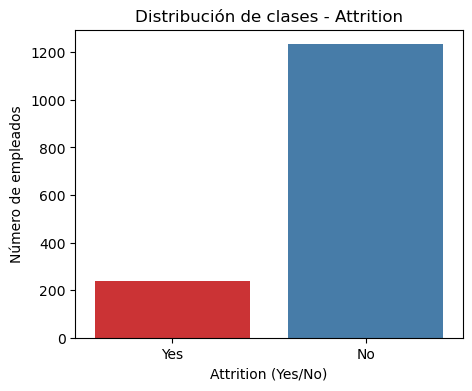

In [6]:
# Distribución de la variable objetivo Attrition
plt.figure(figsize=(5,4))
sns.countplot(
    x="Attrition",
    data=df,
    palette="Set1"
)
plt.title("Distribución de clases - Attrition")
plt.xlabel("Attrition (Yes/No)")
plt.ylabel("Número de empleados")
plt.show()


## Análisis Exploratorio de las Variables Numéricas

Antes de construir cualquier modelo, es fundamental comprender cómo se distribuyen y se comportan las variables numéricas del dataset.  
Este análisis nos permitirá identificar:

- La **distribución** de cada variable.  
- Posibles **valores atípicos (outliers)**.  
- Diferencias entre empleados que **renunciaron (Attrition = Yes)** y los que **permanecieron (Attrition = No)**.  

Para ello realizaremos:
1. Una tabla con estadísticas descriptivas.  
2. Histogramas para observar la distribución.  
3. Boxplots para identificar outliers y diferencias según Attrition.  
4. Un mapa de calor con correlaciones.


In [7]:
# Seleccionar solo variables numéricas
numeric_df = df.select_dtypes(include=["int64", "float64"])

# 1. Estadísticas descriptivas
print("📊 Estadísticas descriptivas:")
display(numeric_df.describe())


📊 Estadísticas descriptivas:


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


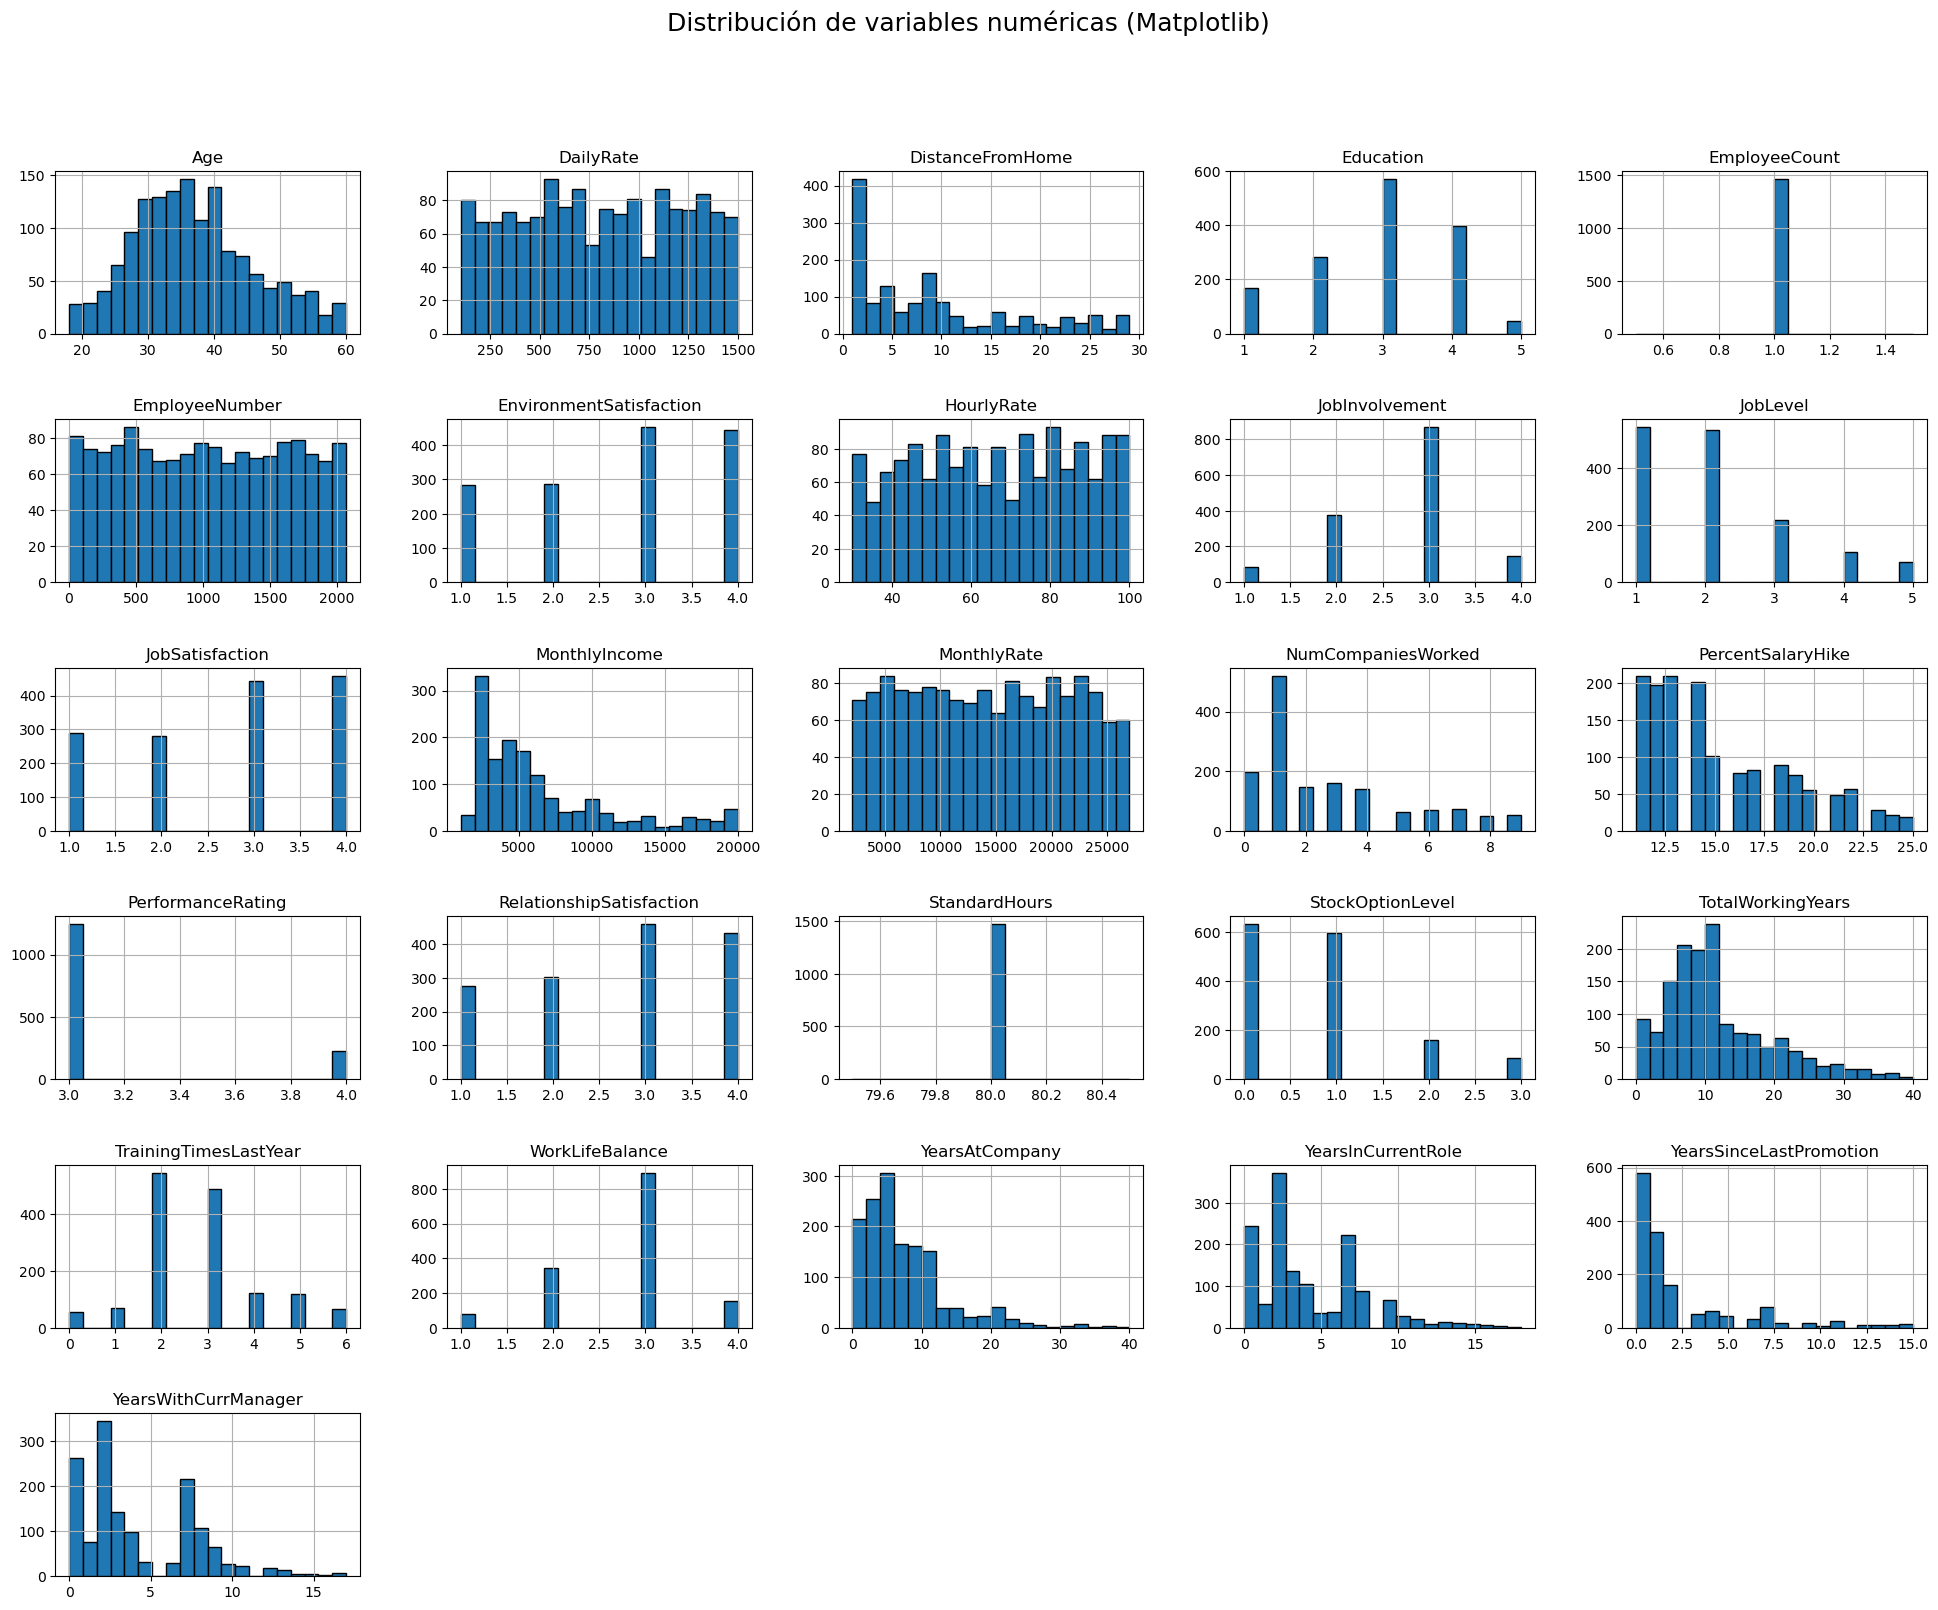

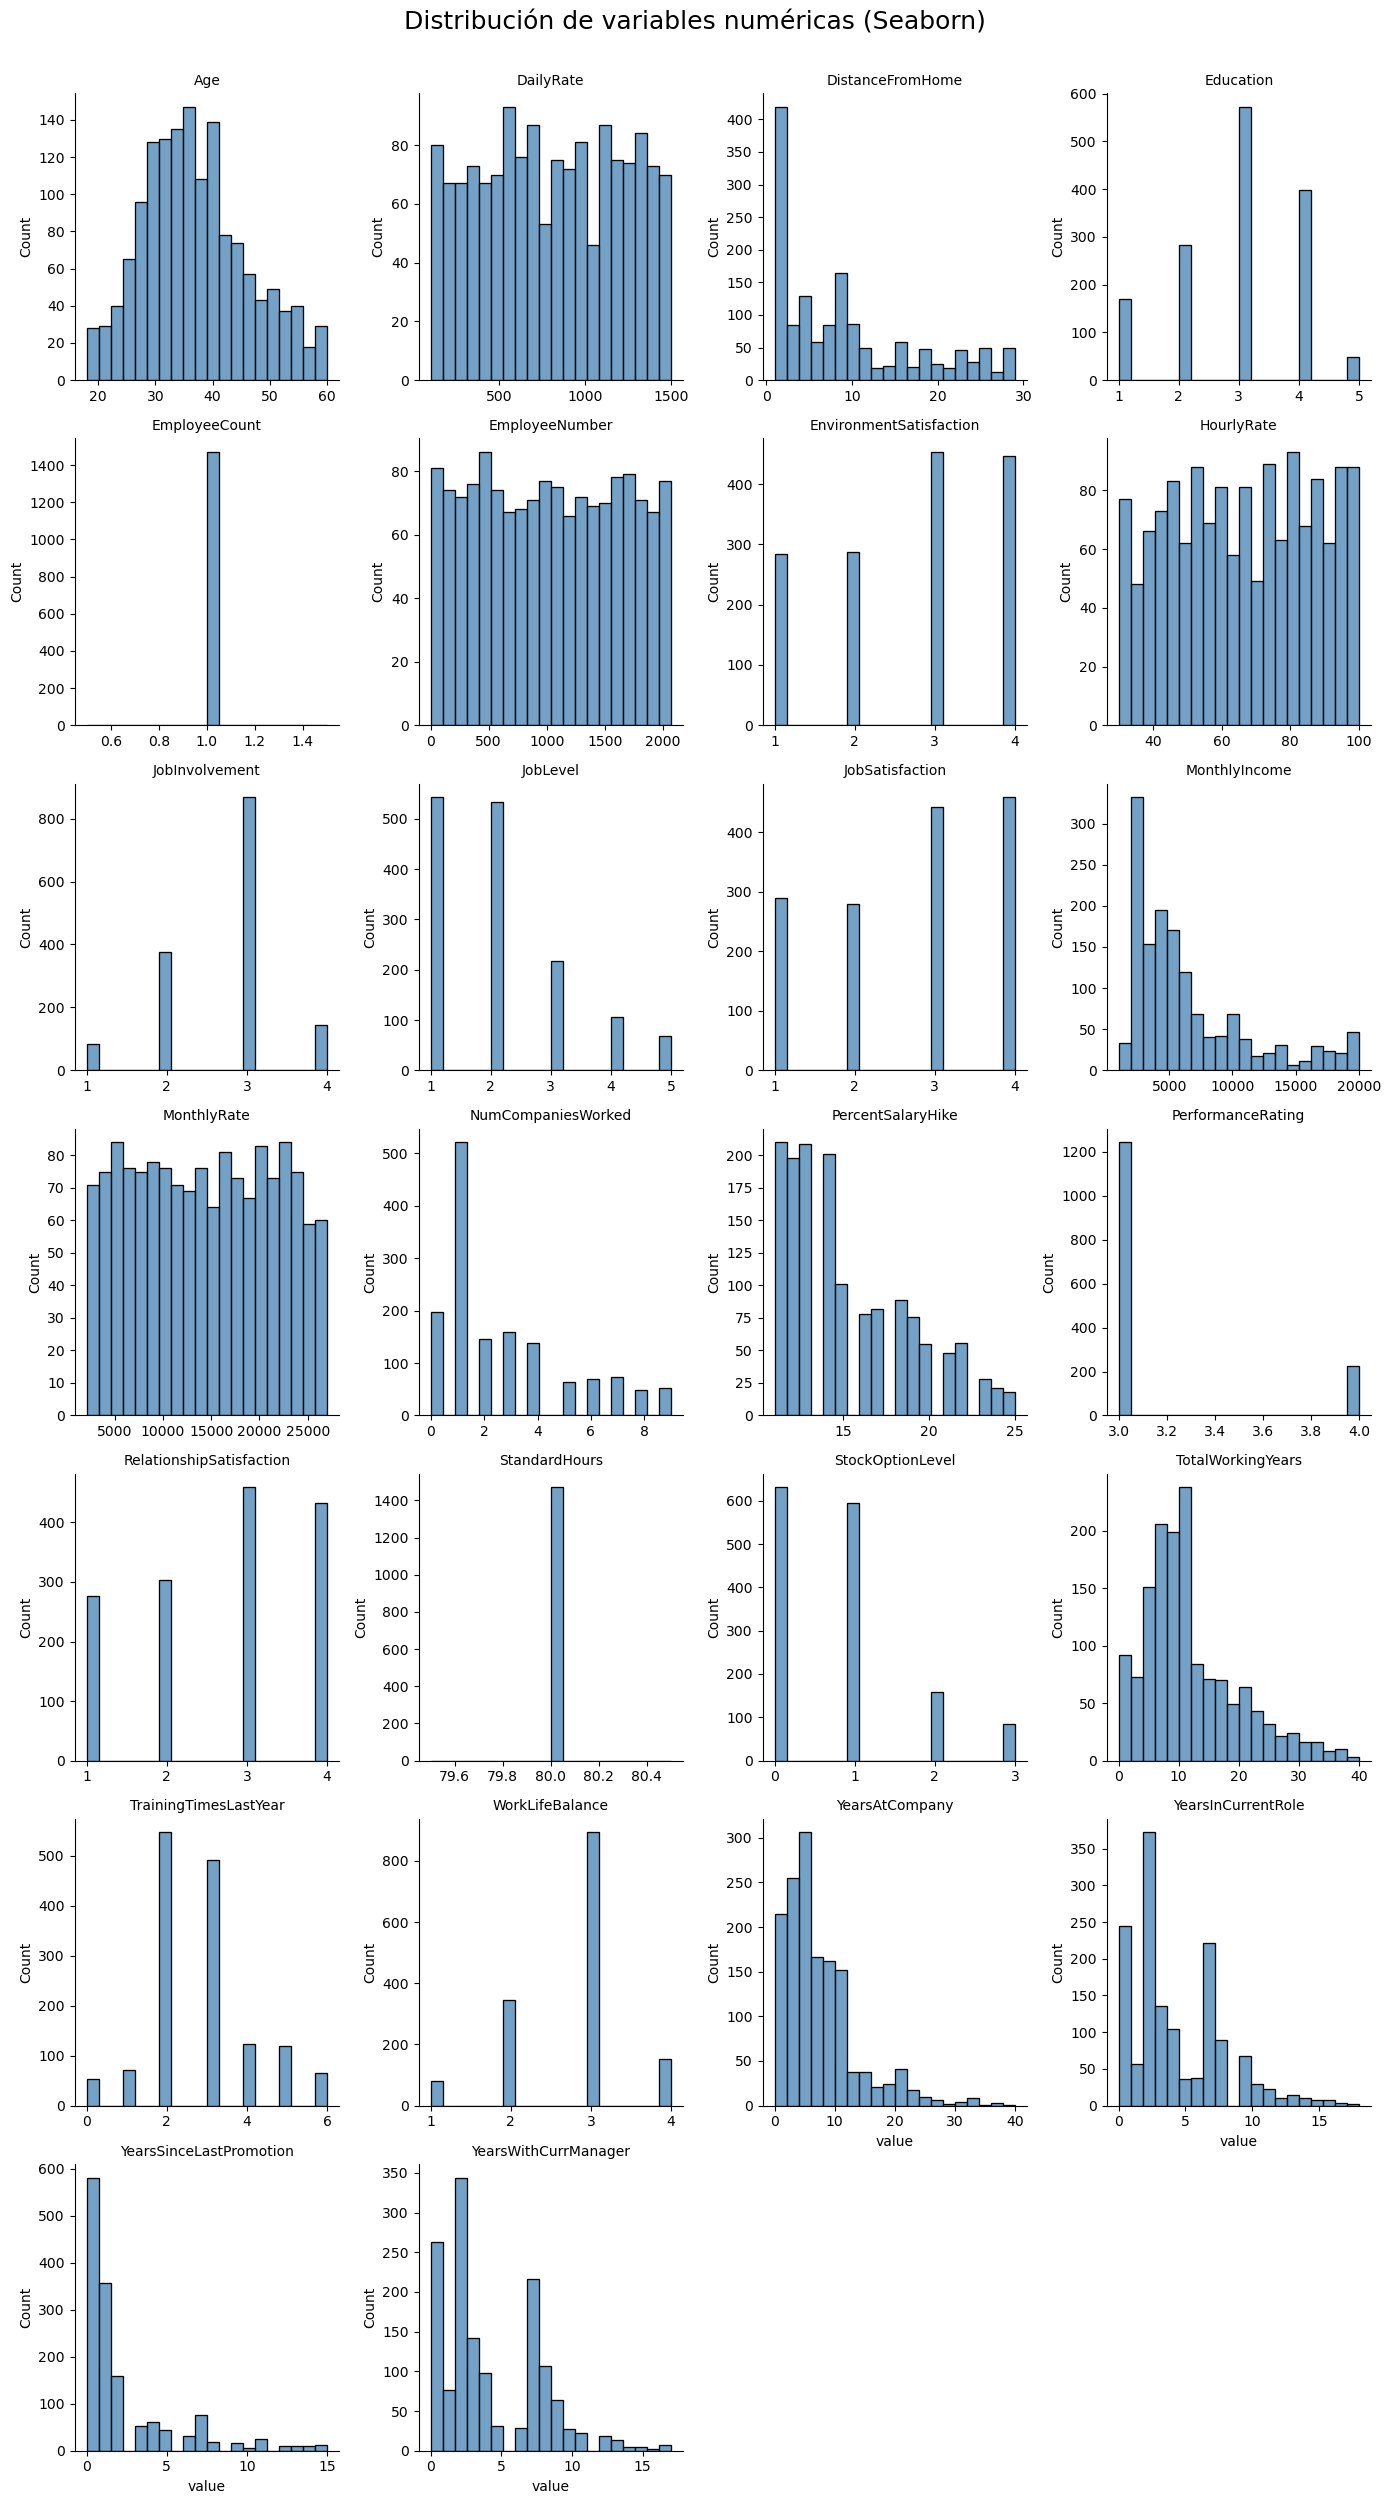

In [8]:
# Visualización de variables numéricas

# ----------------------------------------
# Opción 1: Usando pandas + matplotlib
# Histogramas de todas las variables numéricas en cuadrícula
numeric_df.hist(bins=20, figsize=(20, 16), edgecolor="black")
plt.suptitle("Distribución de variables numéricas (Matplotlib)", fontsize=18, y=1.02)
plt.tight_layout(pad=3.0)  # más espacio entre subplots
plt.show()

# ----------------------------------------
# pción 2: Usando seaborn + FacetGrid
# Convertimos el dataset a formato largo para graficar con FacetGrid
df_melted = df.melt(id_vars="Attrition", value_vars=numeric_df.columns)

# Histogramas por variable en una cuadrícula (4 columnas por fila)
g = sns.FacetGrid(
    df_melted, 
    col="variable", 
    col_wrap=4, 
    sharex=False, 
    sharey=False, 
    height=3.5
)
g.map(sns.histplot, "value", bins=20, kde=False, color="steelblue")
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Distribución de variables numéricas (Seaborn)", fontsize=18, y=1.02)
plt.show()



## Eliminación de columnas irrelevantes

En esta etapa realizamos una limpieza inicial del dataset, eliminando variables que no aportan información útil al análisis:

- **EmployeeCount** → Tiene siempre el mismo valor (1) para todos los empleados, por lo que no ofrece variación.  
- **StandardHours** → Es constante en todo el dataset (80 horas), por lo que tampoco añade valor predictivo.  

Al eliminar estas columnas evitamos ruido en el modelo y mantenemos solo variables que pueden influir en la predicción de la variable objetivo (*Attrition*).  

Finalmente, verificamos que las columnas restantes en `df_clean` correspondan únicamente a variables relevantes para el análisis.


In [9]:
# Eliminación de columnas irrelevantes
df_clean = df.drop(columns=["EmployeeCount", "StandardHours", "EmployeeNumber"])

# Verificación
print("Columnas después de la limpieza:")
print(df_clean.columns.tolist())


Columnas después de la limpieza:
['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [10]:
df_clean.info()  # Información del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

## Boxplots de variables numéricas según Attrition

Con el fin de explorar cómo se comportan las variables numéricas entre empleados que **renunciaron (Attrition = Yes)** y los que **permanecieron (Attrition = No)**, construimos una cuadrícula de **boxplots**.

### ¿Qué nos muestran los boxplots?
- **Distribución central:** la línea dentro de cada caja representa la mediana.  
- **Dispersión:** el rango intercuartílico (caja) y los bigotes muestran cómo varían los valores.  
- **Outliers:** puntos fuera de los bigotes que indican posibles valores atípicos.  
- **Comparación por clase:** nos permite observar si ciertas variables muestran diferencias notorias entre empleados con Attrition = *Yes* y Attrition = *No*.  

### Propósito
- Identificar patrones diferenciales en características como salario, años de experiencia o balance vida-trabajo.  
- Detectar variables que podrían ser **predictoras relevantes** de la rotación.  
- Reconocer la presencia de valores atípicos que podrían requerir tratamiento en el preprocesamiento.  


C:\Users\jlvar\AppData\Local\Temp\ipykernel_7036\2762222202.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition", y=col, data=df_clean, palette="Set2")
C:\Users\jlvar\AppData\Local\Temp\ipykernel_7036\2762222202.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition", y=col, data=df_clean, palette="Set2")
C:\Users\jlvar\AppData\Local\Temp\ipykernel_7036\2762222202.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition", y=col, data=df_clean, palette="Set2")
C:\Users\jlvar\AppData\Local\Temp\ipykernel_7036\

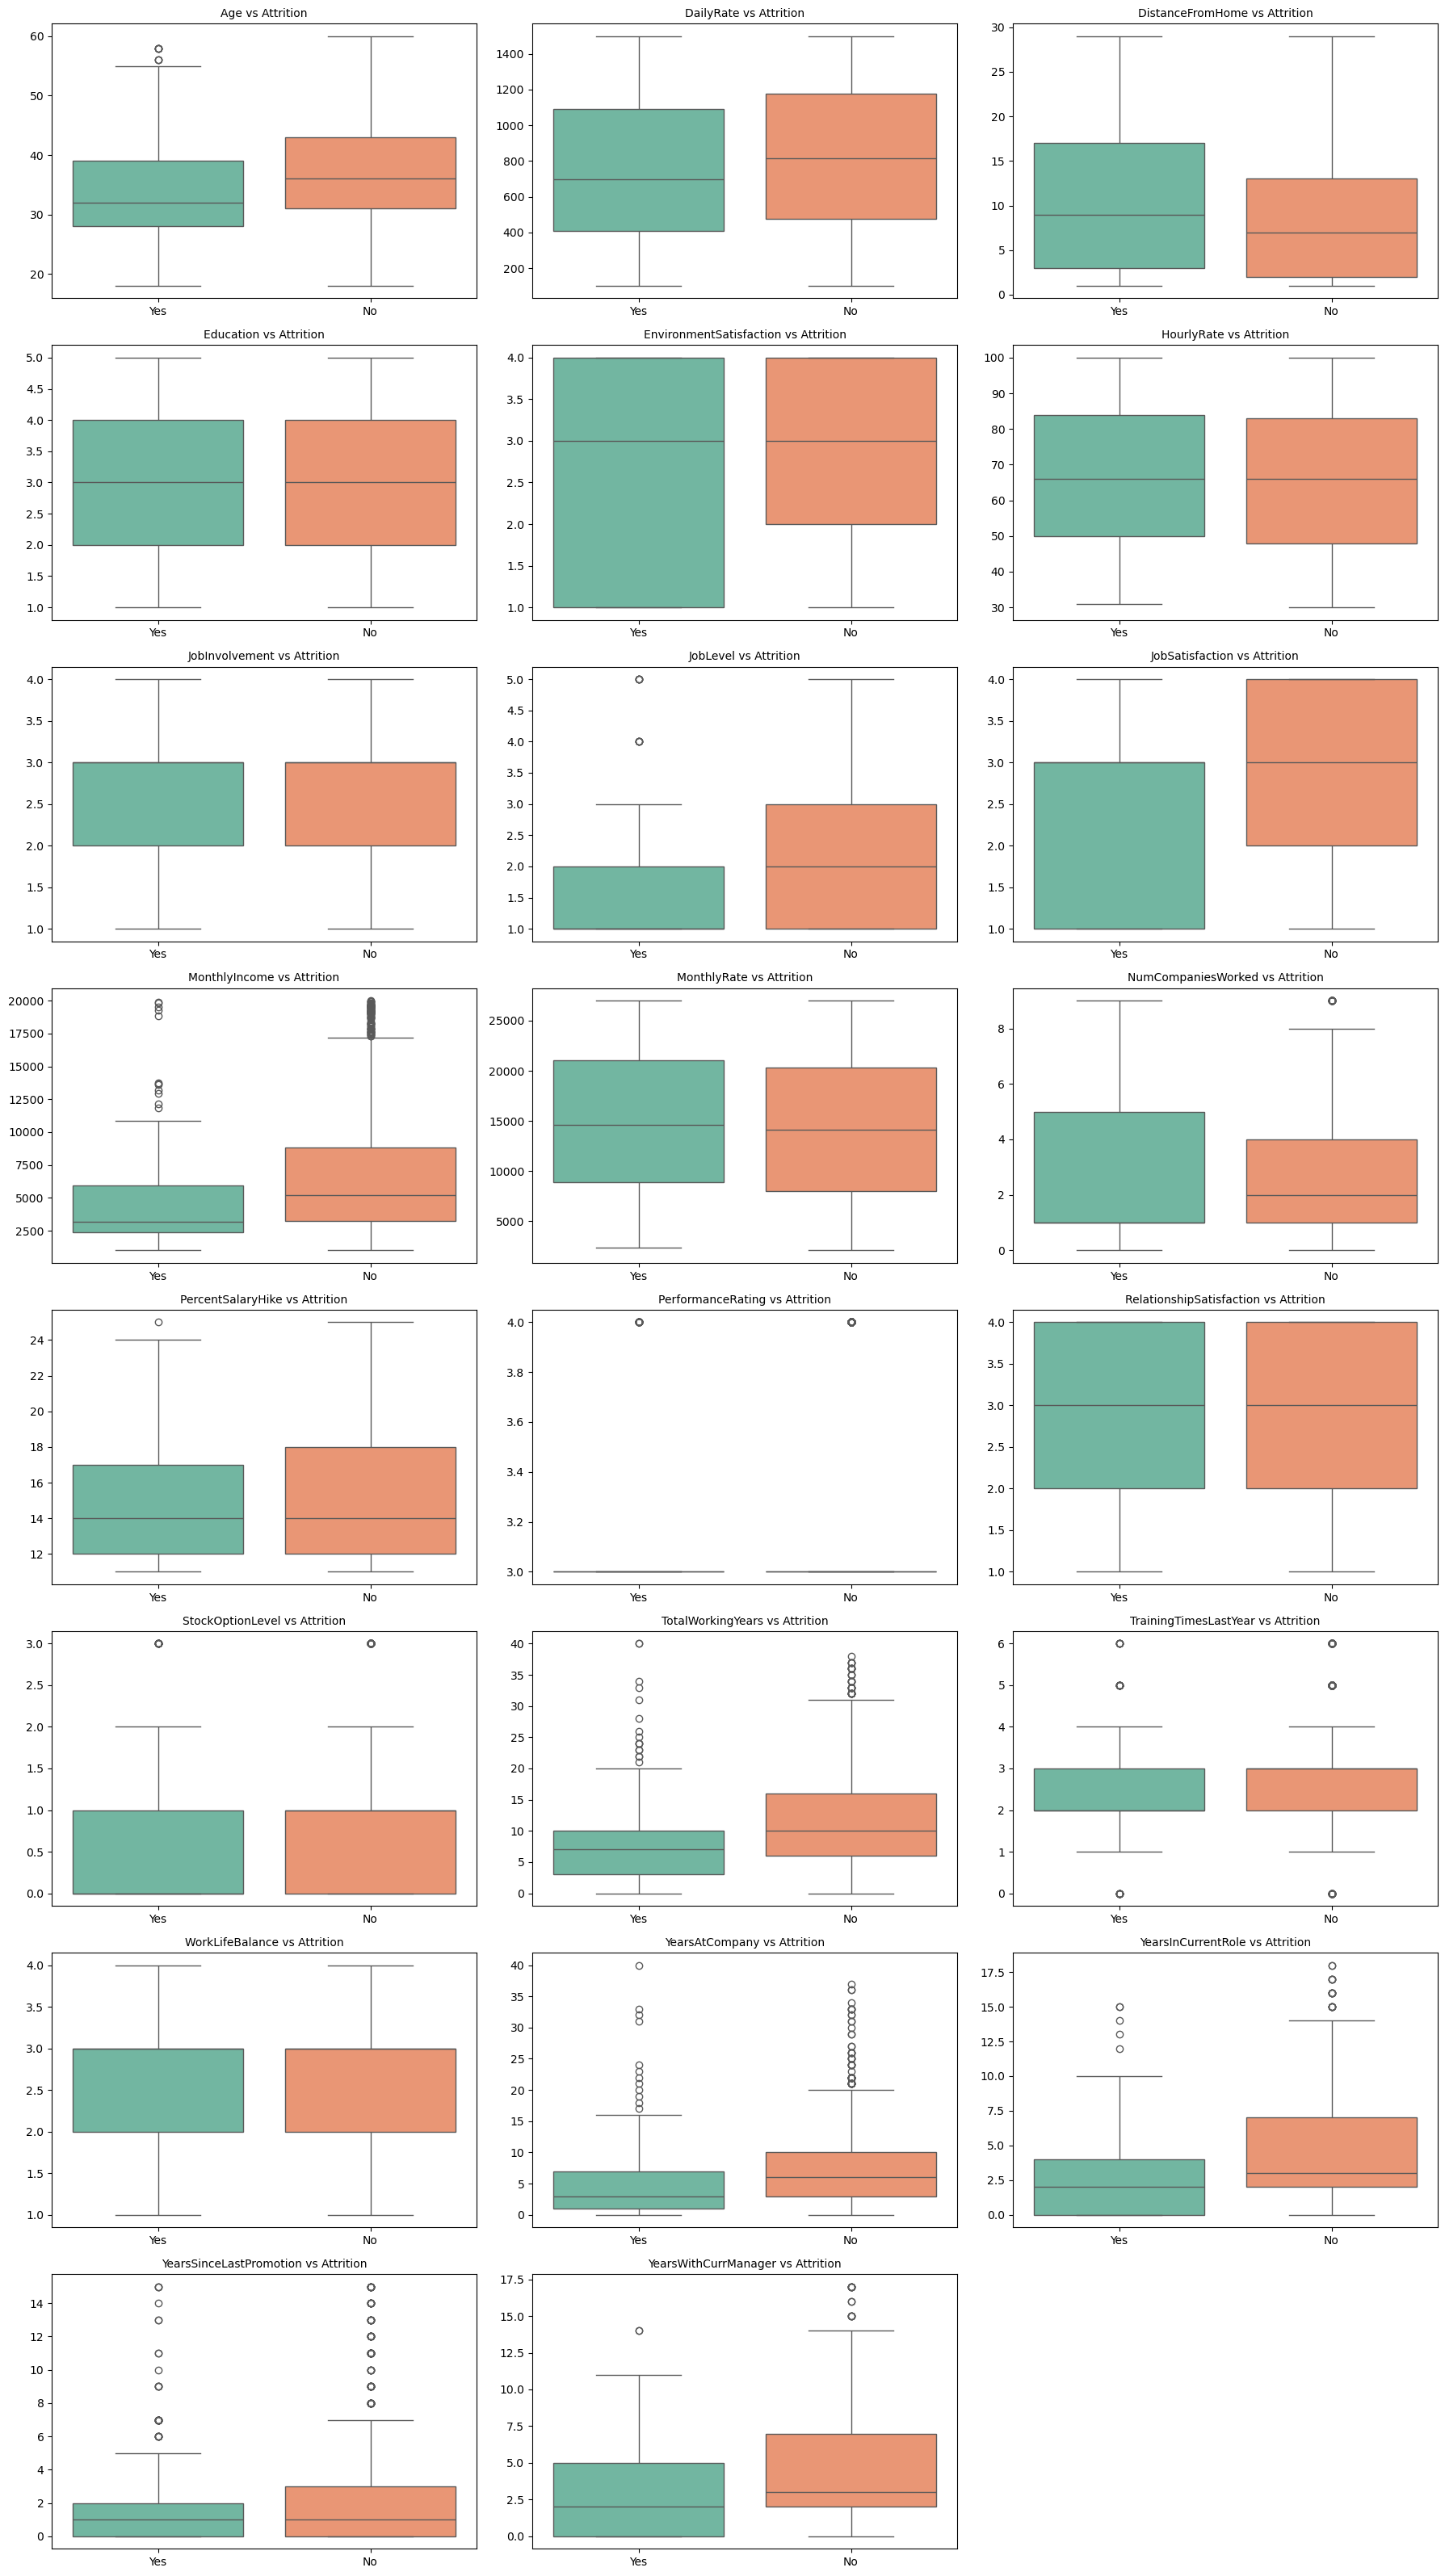

In [11]:
# Boxplots de todas las variables numéricas diferenciadas por Attrition en una cuadrícula
# Seleccionamos solo variables numéricas del df_clean
numeric_clean = df_clean.select_dtypes(include=["int64", "float64"])

# Definir número de filas y columnas en la cuadrícula
num_cols = len(numeric_clean.columns)
cols = 3  # número de gráficos por fila
rows = math.ceil(num_cols / cols)

plt.figure(figsize=(cols*6, rows*4))

# Crear un boxplot por cada variable numérica
for i, col in enumerate(numeric_clean.columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x="Attrition", y=col, data=df_clean, palette="Set2")
    plt.title(f"{col} vs Attrition", fontsize=10)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()



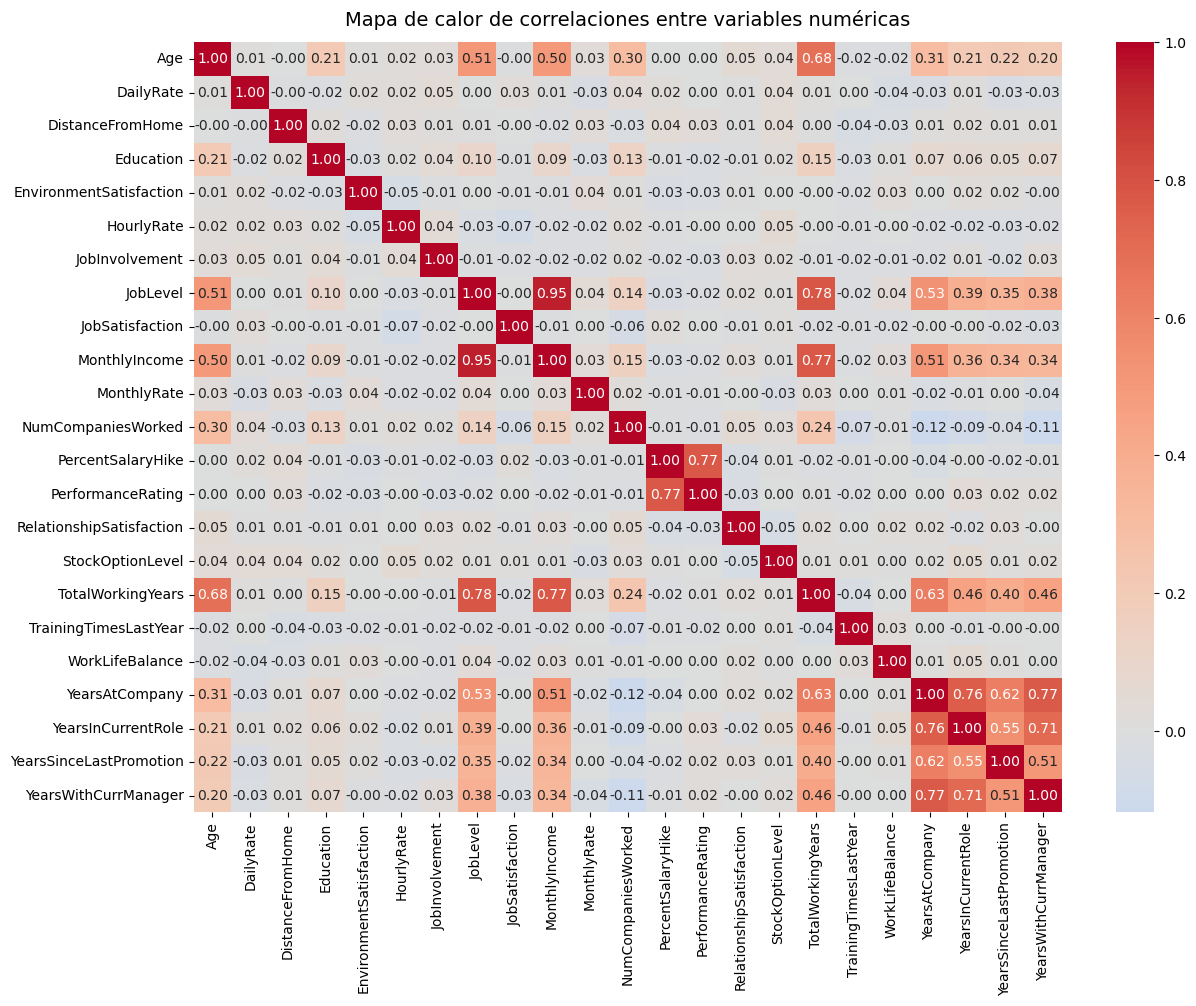

In [12]:
# 4. Mapa de calor de correlaciones (con df_clean)

plt.figure(figsize=(14,10))

# Calcular la matriz de correlaciones
corr = numeric_clean.corr()

# Graficar heatmap
sns.heatmap(
    corr, 
    annot=True,        # mostrar valores de correlación en cada celda
    fmt=".2f",         # formato con 2 decimales
    cmap="coolwarm",   # paleta de colores
    center=0, 
    cbar=True
)

plt.title("Mapa de calor de correlaciones entre variables numéricas", fontsize=14, pad=12)
plt.show()


## Relación entre JobLevel y MonthlyIncome  

Dado que estas dos variables mostraron una correlación muy alta (≈95%), graficarlas juntas nos permite confirmar visualmente esta relación.  
El scatter plot evidencia cómo a medida que aumenta el nivel de puesto (**JobLevel**), también crece el **MonthlyIncome**, lo que indica redundancia en la información y la necesidad de considerar eliminar una de ellas para evitar multicolinealidad.


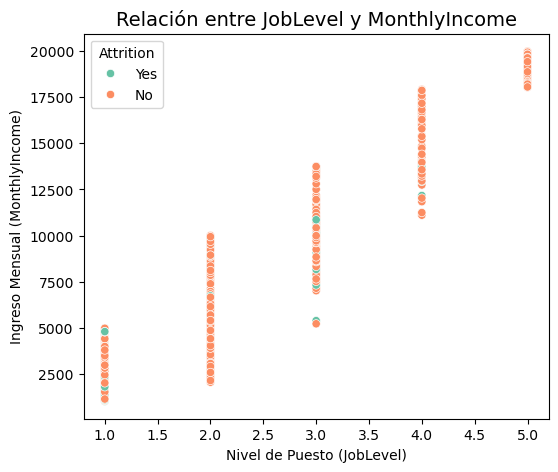

In [13]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x="JobLevel", 
    y="MonthlyIncome", 
    data=df, 
    hue="Attrition",    # opcional, si quieres diferenciar por Attrition
    palette="Set2"
)
plt.title("Relación entre JobLevel y MonthlyIncome", fontsize=14)
plt.xlabel("Nivel de Puesto (JobLevel)")
plt.ylabel("Ingreso Mensual (MonthlyIncome)")
plt.show()


## Identificación de variables altamente correlacionadas  

Calculamos la matriz de correlación y filtramos aquellas variables con una correlación mayor al **90%**.  
Esto nos ayuda a detectar redundancias entre variables, que pueden generar multicolinealidad y afectar el rendimiento o interpretación de los modelos.


In [14]:
high_corr = corr[(corr.abs() > 0.90) & (corr != 1.0)]

print("Variables con correlación mayor al 95%:")
print(high_corr.dropna(axis=0, how='all').dropna(axis=1, how='all'))

Variables con correlación mayor al 95%:
               JobLevel  MonthlyIncome
JobLevel            NaN         0.9503
MonthlyIncome    0.9503            NaN


## Eliminación de la variable JobLevel  

La variable **JobLevel** fue eliminada debido a su **alta correlación (≈95%) con MonthlyIncome**.  
Ambas variables representan información muy similar: a mayor nivel de puesto, mayor ingreso mensual.  
Mantener ambas generaría **redundancia** y posibles problemas de multicolinealidad en modelos como regresiones.  

Se conserva **MonthlyIncome** por ofrecer mayor **variabilidad y granularidad** en los datos, lo que permite a los modelos capturar mejor las diferencias entre empleados.


In [15]:
df_clean = df_clean.drop(columns=["JobLevel"])
print(df_clean.columns.tolist())

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


## Análisis Exploratorio de Variables Categóricas

Las variables categóricas aportan información clave sobre características demográficas, roles y condiciones laborales.  
En este análisis veremos:

1. **Distribución de frecuencias** de cada variable categórica (¿cuántos empleados hay en cada grupo?).  
2. **Relación con Attrition** mediante gráficos de barras segmentados, lo que permite observar si ciertos grupos presentan mayor o menor rotación.  

Este análisis es útil para identificar patrones en factores como el **rol de trabajo, género, estado civil o departamento**, y así detectar posibles focos de riesgo de deserción.


C:\Users\jlvar\AppData\Local\Temp\ipykernel_7036\4219462387.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_clean, palette="Set2", order=df_clean[col].value_counts().index)
C:\Users\jlvar\AppData\Local\Temp\ipykernel_7036\4219462387.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_clean, palette="Set2", order=df_clean[col].value_counts().index)
C:\Users\jlvar\AppData\Local\Temp\ipykernel_7036\4219462387.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_clean, palette="Set2", orde

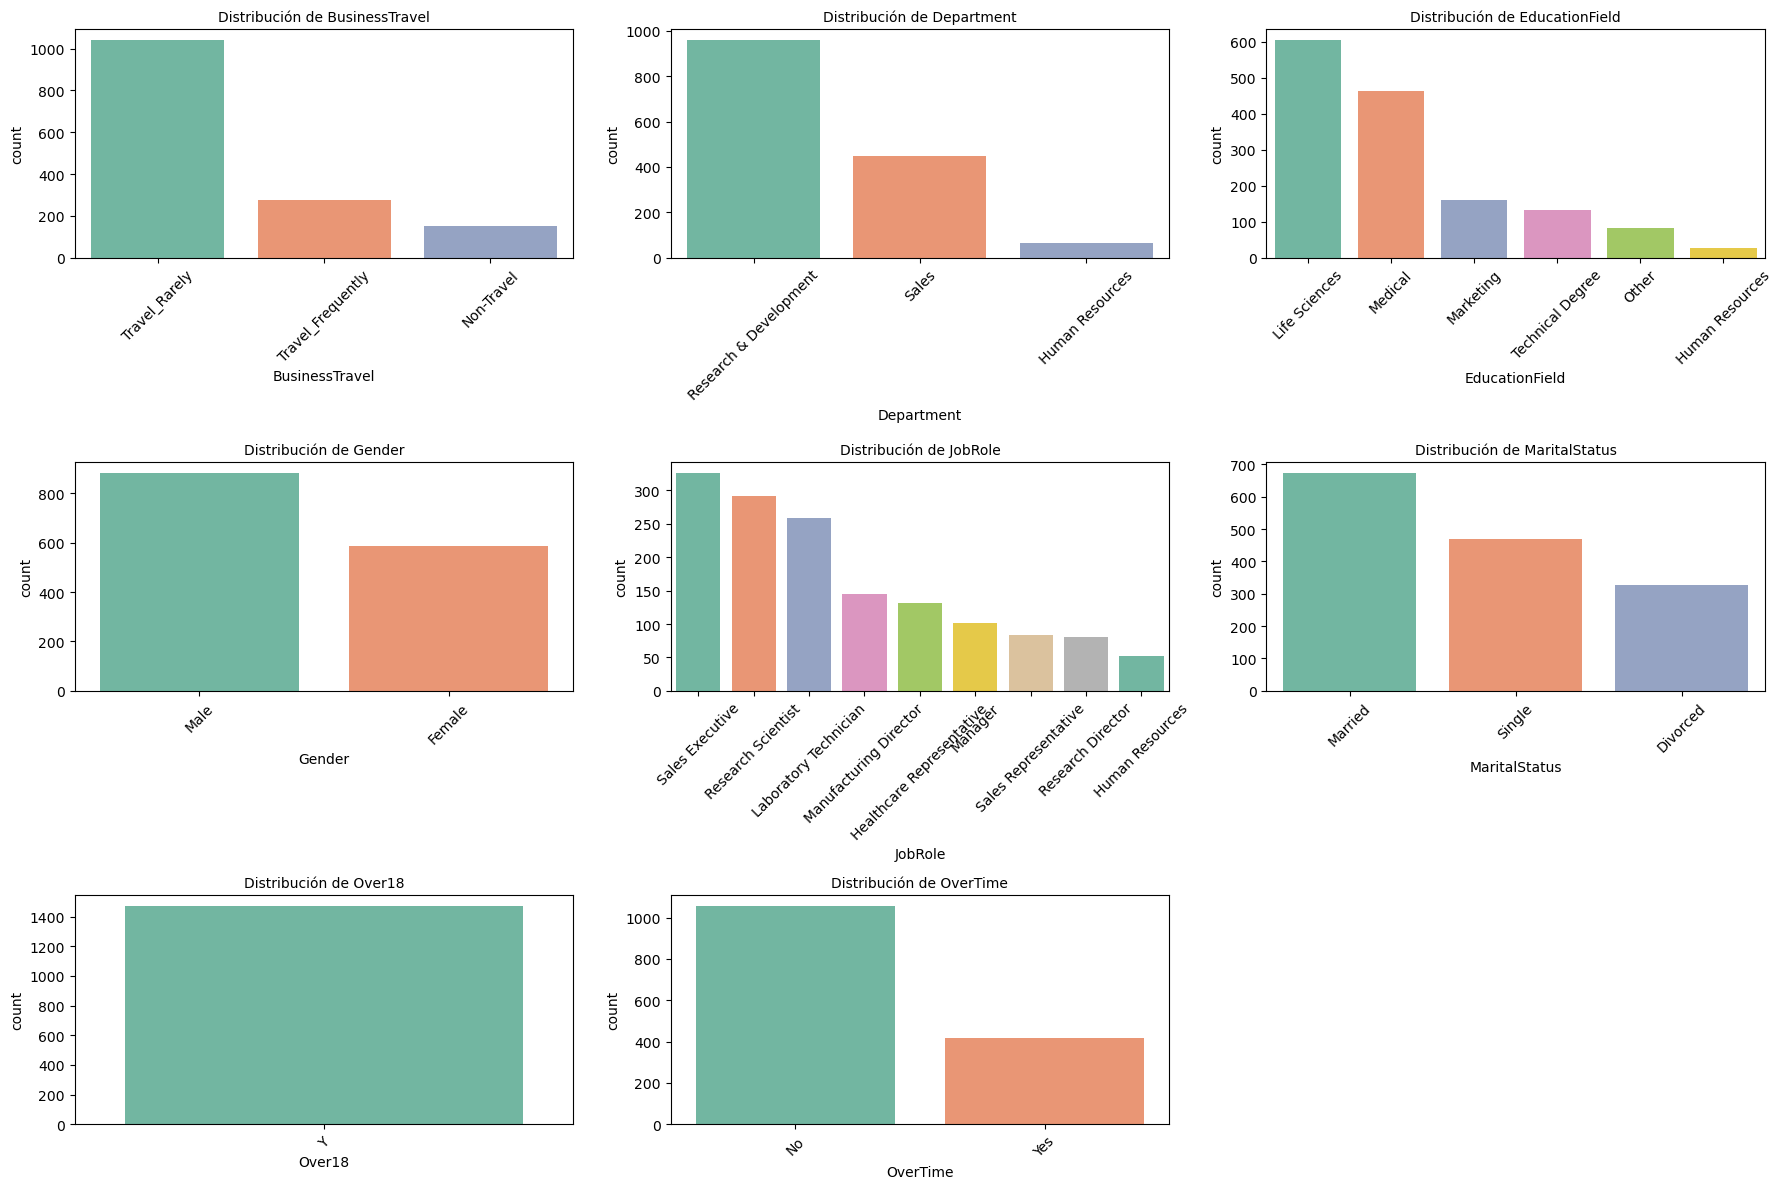

In [16]:
# Variables categóricas (excepto la variable objetivo)
categorical_clean = df_clean.select_dtypes(include=["object"]).drop(columns=["Attrition"])

# Distribución de frecuencias
num_cols = len(categorical_clean.columns)
cols = 3  # número de gráficos por fila
rows = math.ceil(num_cols / cols)

plt.figure(figsize=(cols*6, rows*4))

for i, col in enumerate(categorical_clean.columns, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(x=col, data=df_clean, palette="Set2", order=df_clean[col].value_counts().index)
    plt.title(f"Distribución de {col}", fontsize=10)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Eliminación de la columna categórica irrelevante *Over18*

En este paso eliminamos la variable **`Over18`** del dataset.  
La razón es que esta columna no aporta información útil para el análisis ni para el modelado predictivo, ya que **todos los registros tienen el mismo valor ("Yes")**.  


In [17]:
# Eliminar la columna categórica irrelevante "Over18"
df_clean = df_clean.drop(columns=["Over18"])

# Verificación
print("Columnas después de la limpieza:")
print(df_clean.columns.tolist())


Columnas después de la limpieza:
['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


## Relación entre variables categóricas y Attrition  

En este paso exploramos cómo se distribuye la variable objetivo **Attrition** dentro de cada una de las variables categóricas.  

- Se utiliza un **countplot** para cada variable categórica, comparando la frecuencia de empleados que permanecieron en la empresa (*No*) frente a quienes se fueron (*Yes*).  
- Los gráficos están organizados en una cuadrícula para facilitar la comparación simultánea.  
- Esta visualización permite detectar **patrones de rotación** asociados a ciertas categorías (por ejemplo, departamentos, roles, educación, etc.).  

Con este análisis podemos identificar qué características categóricas podrían tener mayor influencia en la rotación de empleados.


KeyError: 'Over18'

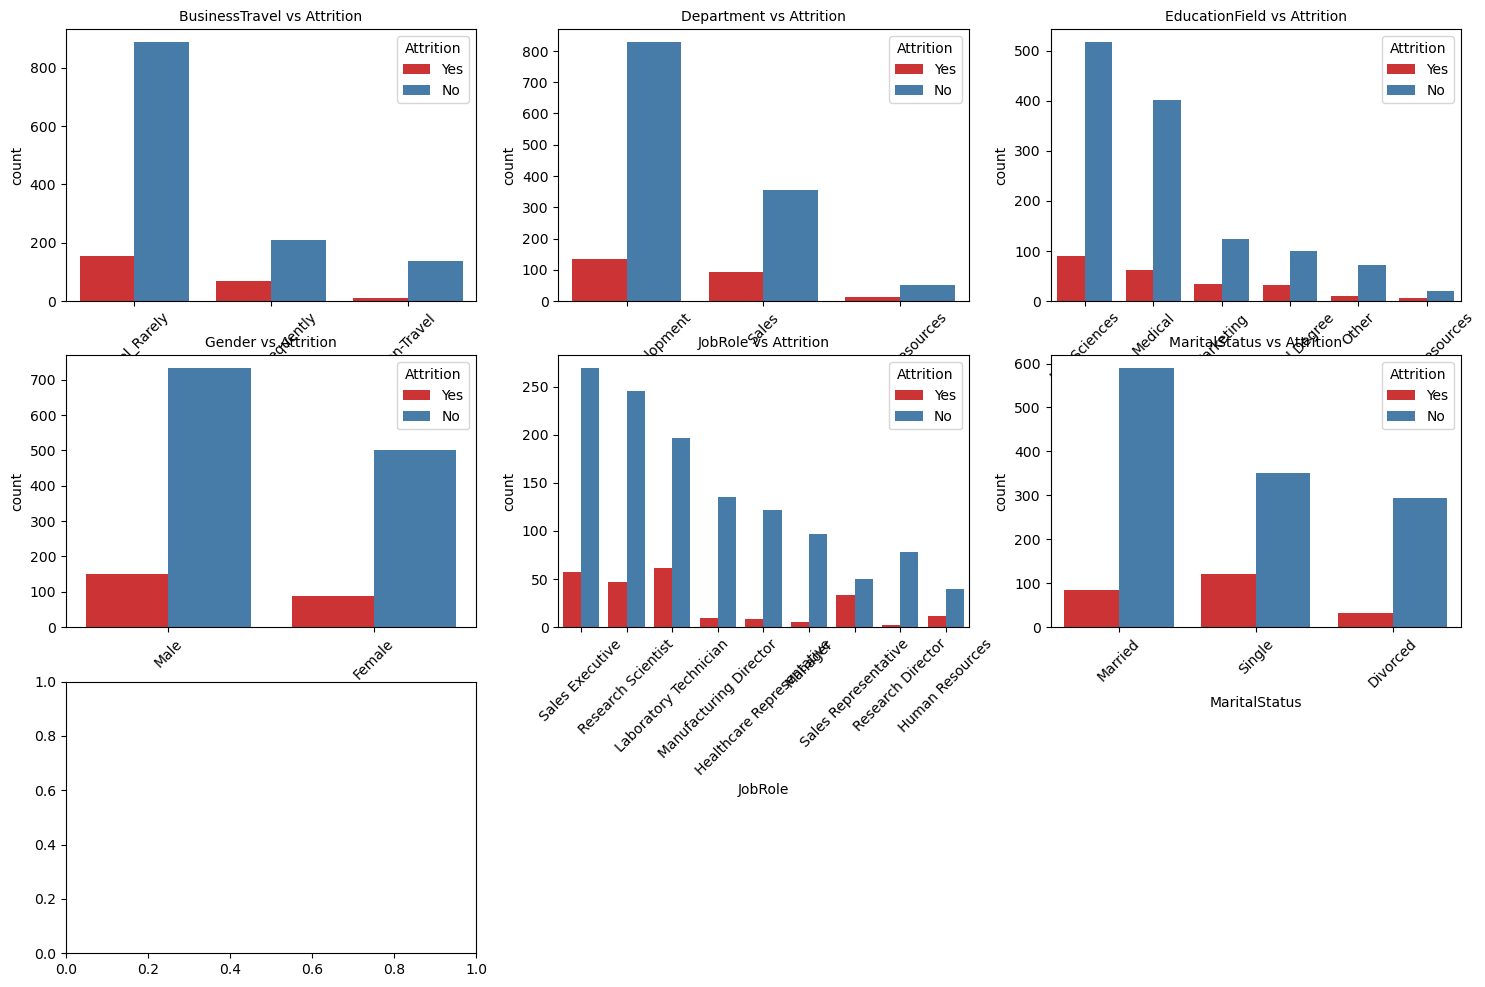

In [18]:
#  Relación entre variables categóricas y Attrition
num_cols = len(categorical_clean.columns)
cols = 3  # número de gráficos por fila
rows = math.ceil(num_cols / cols)

plt.figure(figsize=(cols*6, rows*4))

for i, col in enumerate(categorical_clean.columns, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(x=col, hue="Attrition", data=df_clean, palette="Set1", order=df_clean[col].value_counts().index)
    plt.title(f"{col} vs Attrition", fontsize=10)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## ⚖️ Estandarización de variables numéricas

Antes de construir los modelos, es importante que todas las variables numéricas estén en la **misma escala**.  
Esto evita que variables con valores grandes (como *MonthlyIncome*) dominen sobre otras con valores pequeños (como *YearsAtCompany*).  

Para ello utilizamos **StandardScaler**, que transforma cada variable de la siguiente manera:

\[
z = \frac{x - \mu}{\sigma}
\]

donde:
- \( x \) = valor original,  
- \( \mu \) = media de la variable,  
- \( \sigma \) = desviación estándar.  

De esta forma, cada variable numérica queda con:
- Media = 0  
- Desviación estándar = 1  

➡️ Ahora nuestro DataFrame contiene:
- Variables numéricas estandarizadas.  
- Variables categóricas aún sin codificar.  
- La variable objetivo `Attrition`.  

Este será el insumo para aplicar **One-Hot Encoding** sobre las variables categóricas.


In [19]:

# 1️⃣ Seleccionar variables numéricas 
numeric_cols = df_clean.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Variables numéricas a estandarizar:", numeric_cols)

# 2️⃣ Instanciar StandardScaler
scaler = StandardScaler()

# 3️⃣ Ajustar y transformar las variables numéricas
numeric_scaled = scaler.fit_transform(df_clean[numeric_cols])

# 4️⃣ Crear DataFrame con las variables estandarizadas
numeric_scaled_df = pd.DataFrame(
    numeric_scaled,
    columns=numeric_cols,
    index=df_clean.index
)

# 5️⃣ Reconstruir un DataFrame temporal con:
#    - Variables numéricas estandarizadas
#    - Variables categóricas originales
#    - Variable objetivo Attrition_numeric
df_scaled_temp = pd.concat(
    [numeric_scaled_df, df_clean.drop(columns=numeric_cols)],
    axis=1
)

# Verificación
print("Shape del DataFrame con numéricas estandarizadas:", df_scaled_temp.shape)
df_scaled_temp.head()


Variables numéricas a estandarizar: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Shape del DataFrame con numéricas estandarizadas: (1470, 30)


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,1.153254,-0.108350,0.726020,...,-0.679146,0.245834,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.660853,-0.291719,1.488876,...,-0.368715,0.806541,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,0.246200,-0.937654,-1.674841,...,-0.679146,-1.155935,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,0.246200,-0.763634,1.243211,...,0.252146,-1.155935,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.660853,-0.644858,0.325900,...,-0.058285,-0.595227,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


## Codificación de variables categóricas con One-Hot Encoding

En este paso convertimos todas las **variables categóricas** en formato numérico utilizando **One-Hot Encoding**.  

### Proceso
1. **Selección de variables categóricas:** identificamos todas las columnas con datos de tipo *object*.  
2. **Instanciación de OneHotEncoder:** configuramos `drop="first"` para eliminar la primera categoría de cada variable y así evitar multicolinealidad.  
3. **Transformación:** convertimos cada categoría en una columna binaria (0 = no pertenece, 1 = pertenece).  
4. **Construcción de DataFrame:** creamos un DataFrame con los resultados de la codificación.  
5. **Concatenación:** unimos las variables numéricas ya estandarizadas, las variables categóricas codificadas y la variable objetivo `Attrition`.  


In [20]:

# 1️⃣ Seleccionar las columnas categóricas restantes (en el df con numéricas ya escaladas)
categorical_cols = df_scaled_temp.select_dtypes(include=["object"]).columns.tolist()
print("Variables categóricas a codificar:", categorical_cols)

# 2️⃣ Instanciar el OneHotEncoder con drop='first' y salida como array
encoder = OneHotEncoder(drop="first", sparse_output=False)

# 3️⃣ Ajustar y transformar las variables categóricas
categorical_encoded = encoder.fit_transform(df_scaled_temp[categorical_cols])

# 4️⃣ Crear un DataFrame con las variables codificadas
categorical_encoded_df = pd.DataFrame(
    categorical_encoded,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=df_scaled_temp.index
)

# 5️⃣ Concatenar: numéricas estandarizadas + categóricas codificadas + objetivo
df_encoded = pd.concat(
    [df_scaled_temp.drop(columns=categorical_cols), categorical_encoded_df],
    axis=1
)

# Verificación
print("Shape del nuevo DataFrame codificado:", df_encoded.shape)
df_encoded["Attrition_Yes"].head(10)
print(df_encoded.columns.tolist())



Variables categóricas a codificar: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Shape del nuevo DataFrame codificado: (1470, 44)
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'Gender_Male', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole

##  División de los datos en entrenamiento y prueba

En este paso separamos las variables predictoras (**X**) de la variable objetivo (**y = Attrition_Yes**).  

- Se utiliza un **train/test split** con un 75% de los datos para entrenamiento y 25% para prueba.  
- Se establece una **semilla (random_state=42)** para garantizar reproducibilidad.  
- Se aplica el parámetro **stratify=y**, lo que asegura que la proporción de clases (*Yes/No*) se mantenga tanto en el conjunto de entrenamiento como en el de prueba.  

Finalmente, se imprimen las proporciones de `y_train` y `y_test` para verificar que el balance de clases se conserva tras la división.


In [21]:
from sklearn.model_selection import train_test_split

# Definir X (todas las variables excepto la target) y y (la target)
X = df_encoded.drop(columns=["Attrition_Yes"])
y = df_encoded["Attrition_Yes"]

# División estratificada en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,       # 25% para test
    random_state=42,      # semilla para reproducibilidad
    stratify=y,            # mantiene proporciones de Attrition
    shuffle=True           # mezcla los datos antes de dividir

)

# Verificación de balanceo
print("Proporción en y_train:\n", y_train.value_counts(normalize=True))
print("\nProporción en y_test:\n", y_test.value_counts(normalize=True))


Proporción en y_train:
 Attrition_Yes
0.0    0.838475
1.0    0.161525
Name: proportion, dtype: float64

Proporción en y_test:
 Attrition_Yes
0.0    0.839674
1.0    0.160326
Name: proportion, dtype: float64


## Entrenamiento y evaluación de múltiples modelos de clasificación

En este bloque se definen y comparan diferentes algoritmos de clasificación para predecir la rotación de empleados (**Attrition**):

- **Logistic Regression**  
- **K-Nearest Neighbors (KNN)**  
- **Decision Tree**  
- **Random Forest**  
- **Gradient Boosting**  
- **Support Vector Machine (SVM)**  

Cada modelo se entrena con el conjunto de entrenamiento (**X_train, y_train**) y se evalúa en el conjunto de prueba (**X_test, y_test**).  
Las métricas calculadas son:  

- **Accuracy** → proporción de predicciones correctas.  
- **Precision** → proporción de predicciones positivas que realmente son positivas.  
- **Recall** → proporción de casos positivos correctamente detectados.  
- **F1-Score** → equilibrio entre *Precision* y *Recall*.  

Finalmente, se organiza una tabla comparativa de resultados, ordenada por **F1-Score**, para identificar el modelo con mejor desempeño global en un escenario de clases desbalanceadas.


In [26]:
# Diccionario de modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced", random_state=42),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(class_weight="balanced", random_state=42)
}

# Entrenamiento y evaluación
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results.append({
        "Modelo": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

# Convertir resultados a DataFrame
results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)
results_df


,Modelo,Accuracy,Precision,Recall,F1-Score
5,SVM,0.834239,0.485714,0.576271,0.527132
0,Logistic Regression,0.771739,0.373737,0.627119,0.468354
4,Gradient Boosting,0.850543,0.590909,0.220339,0.320988
2,Decision Tree,0.760870,0.276923,0.305085,0.290323
3,Random Forest,0.847826,0.666667,0.101695,0.176471
1,KNN,0.836957,0.454545,0.084746,0.142857


## Matrices de confusión por modelo  

En este bloque se generan las **matrices de confusión** para cada uno de los modelos entrenados, organizadas en una cuadrícula.  

La matriz de confusión permite evaluar el rendimiento del modelo mostrando:  
- **Verdaderos negativos (TN):** empleados predichos correctamente como *No Attrition*.  
- **Falsos positivos (FP):** empleados predichos como *Attrition=Yes* pero que en realidad permanecieron.  
- **Falsos negativos (FN):** empleados que sí se fueron (*Attrition=Yes*), pero el modelo no los detectó.  
- **Verdaderos positivos (TP):** empleados que se fueron y el modelo los predijo correctamente.  

Esta visualización facilita la comparación de los errores y aciertos de cada modelo, más allá de métricas agregadas como Accuracy o F1-Score.


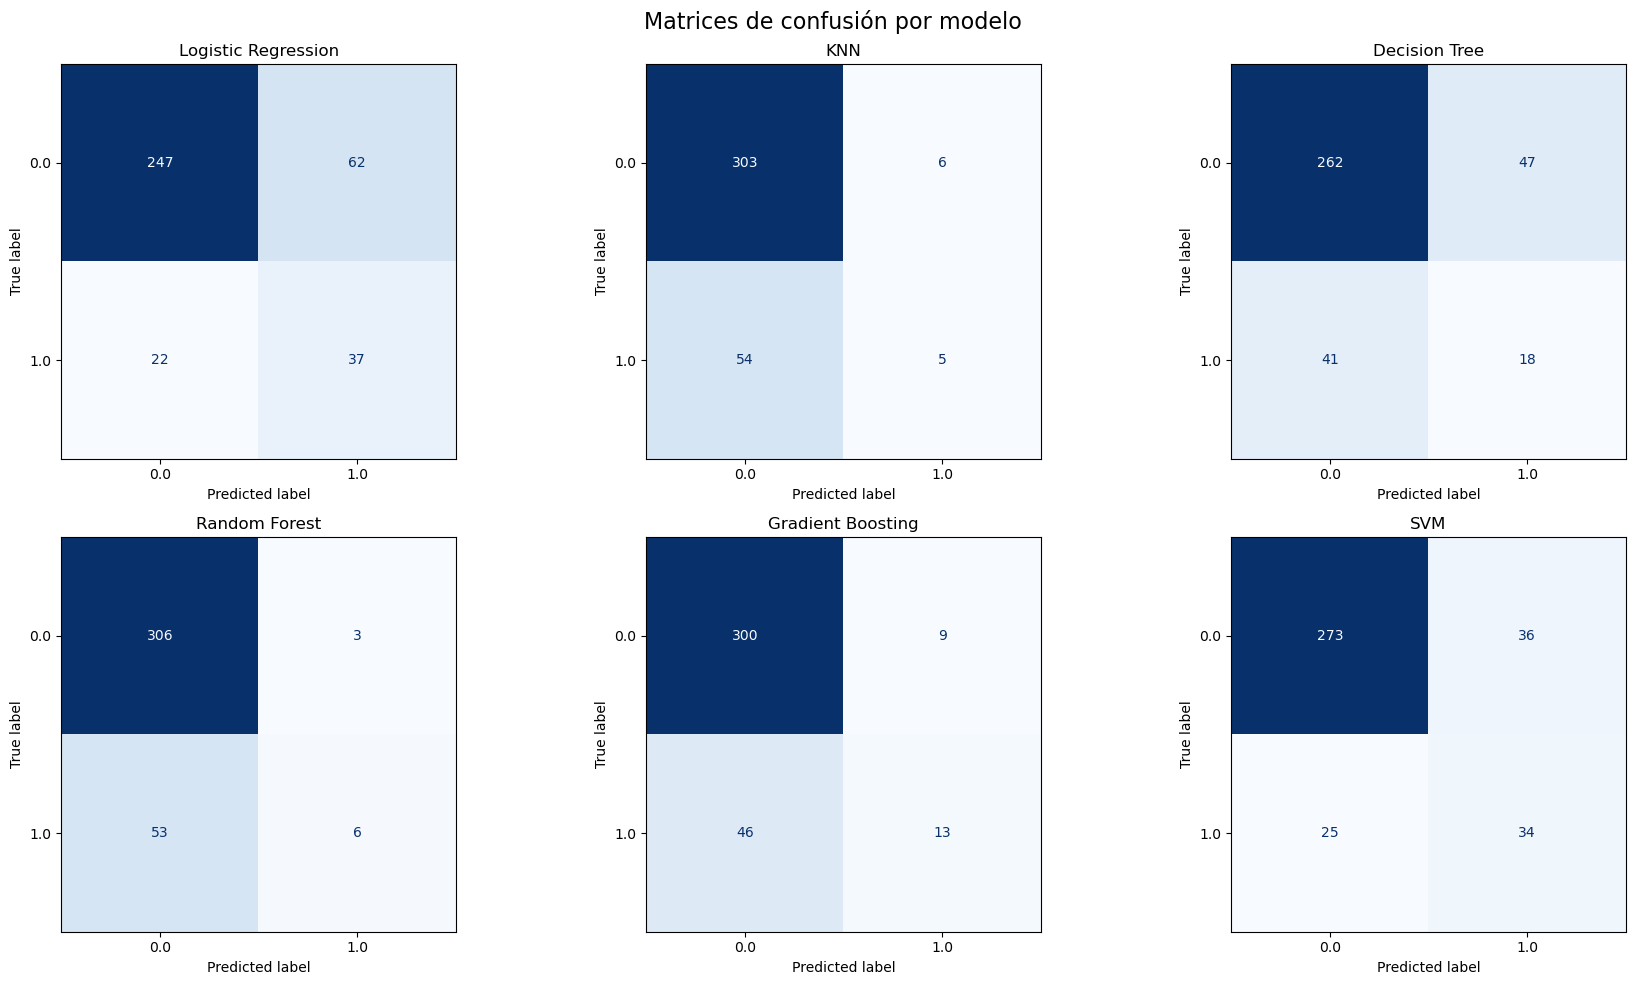

In [27]:
#  Matrices de confusión de todos los modelos
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 filas x 3 columnas (ajusta según # de modelos)
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=axes[i], cmap="Blues", colorbar=False)
    axes[i].set_title(name)

plt.suptitle("Matrices de confusión por modelo", fontsize=16)
plt.tight_layout()
plt.show()


## Subsampling de la clase mayoritaria (undersampling)

En este bloque se aplica **undersampling** para balancear el conjunto de entrenamiento en la predicción de *Attrition*.  

### Pasos realizados:
1. **Separación de variables:**
   - `X_2`: todas las variables predictoras.  
   - `y_2`: variable objetivo (`Attrition_Yes`).  

2. **División train/test estratificada:**  
   - Se usa un 75% para entrenamiento y 25% para prueba.  
   - El parámetro `stratify` garantiza que se mantenga la proporción de clases en ambos subconjuntos.  

3. **Separación por clases en el train:**  
   - `X_majority`: empleados con *Attrition=No* (clase mayoritaria).  
   - `X_minority`: empleados con *Attrition=Yes* (clase minoritaria).  

4. **Submuestreo:**  
   - Se reduce la clase mayoritaria al mismo tamaño que la minoritaria, sin reemplazo (`replace=False`).  

5. **Combinación y aleatorización:**  
   - Se unen ambas clases balanceadas y se mezclan aleatoriamente para obtener el nuevo conjunto de entrenamiento (`X_train_balanced`, `y_train_balanced`).  

 
Con este enfoque, el modelo entrena sobre un dataset **balanceado**, pero se evalúa sobre datos **desbalanceados reales**, lo que permite medir su capacidad de generalización.


In [28]:
#  Definir X (todas las variables excepto la target) y y (la target)
X_2 = df_encoded.drop(columns=["Attrition_Yes"])
y_2 = df_encoded["Attrition_Yes"]

#  División estratificada en train y test
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_2, y_2,
    test_size=0.25,
    random_state=42,
    stratify=y_2 
)

#  Subsampling de la clase mayoritaria (No)
X_train_2 = pd.DataFrame(X_train_2, columns=X_2.columns)
y_train_2 = pd.Series(y_train_2, name="Attrition")

# Separar clases
X_majority = X_train_2[y_train_2 == 0]
X_minority = X_train_2[y_train_2 == 1]

# Submuestreo de la clase mayoritaria
X_majority_downsampled, y_majority_downsampled = resample(
    X_majority,
    y_train_2[y_train_2 == 0],
    replace=False,                # sin reemplazo
    n_samples=len(X_minority),    # igual tamaño que la minoritaria
    random_state=42
)

# Combinar datos balanceados
X_train_balanced = pd.concat([X_majority_downsampled, X_minority])
y_train_balanced = pd.concat([y_majority_downsampled, y_train_2[y_train_2 == 1]])

# Mezclar aleatoriamente
X_train_balanced, y_train_balanced = resample(
    X_train_balanced, y_train_balanced, random_state=42
)

# ✅ Verificación de balanceo
print("Proporción en y_train_balanced:\n", y_train_balanced.value_counts(normalize=True))
print("\nProporción en y_test:\n", y_test_2.value_counts(normalize=True))


Proporción en y_train_balanced:
 Attrition
1.0    0.511236
0.0    0.488764
Name: proportion, dtype: float64

Proporción en y_test:
 Attrition_Yes
0.0    0.839674
1.0    0.160326
Name: proportion, dtype: float64


##  Modelos entrenados con undersampling  

Se entrenan varios algoritmos de clasificación (Regresión Logística, KNN, Árboles, Random Forest, Gradient Boosting y SVM) usando el **train balanceado por subsampling**.  

Las métricas (Accuracy, Precision, Recall y F1-Score) se calculan sobre el **test original** y se muestran las **matrices de confusión** para comparar el desempeño de cada modelo.


                Modelo  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.774457   0.377551  0.627119  0.471338
5                  SVM  0.741848   0.339286  0.644068  0.444444
3        Random Forest  0.720109   0.319672  0.661017  0.430939
4    Gradient Boosting  0.709239   0.296610  0.593220  0.395480
2        Decision Tree  0.614130   0.225166  0.576271  0.323810
1                  KNN  0.630435   0.226950  0.542373  0.320000


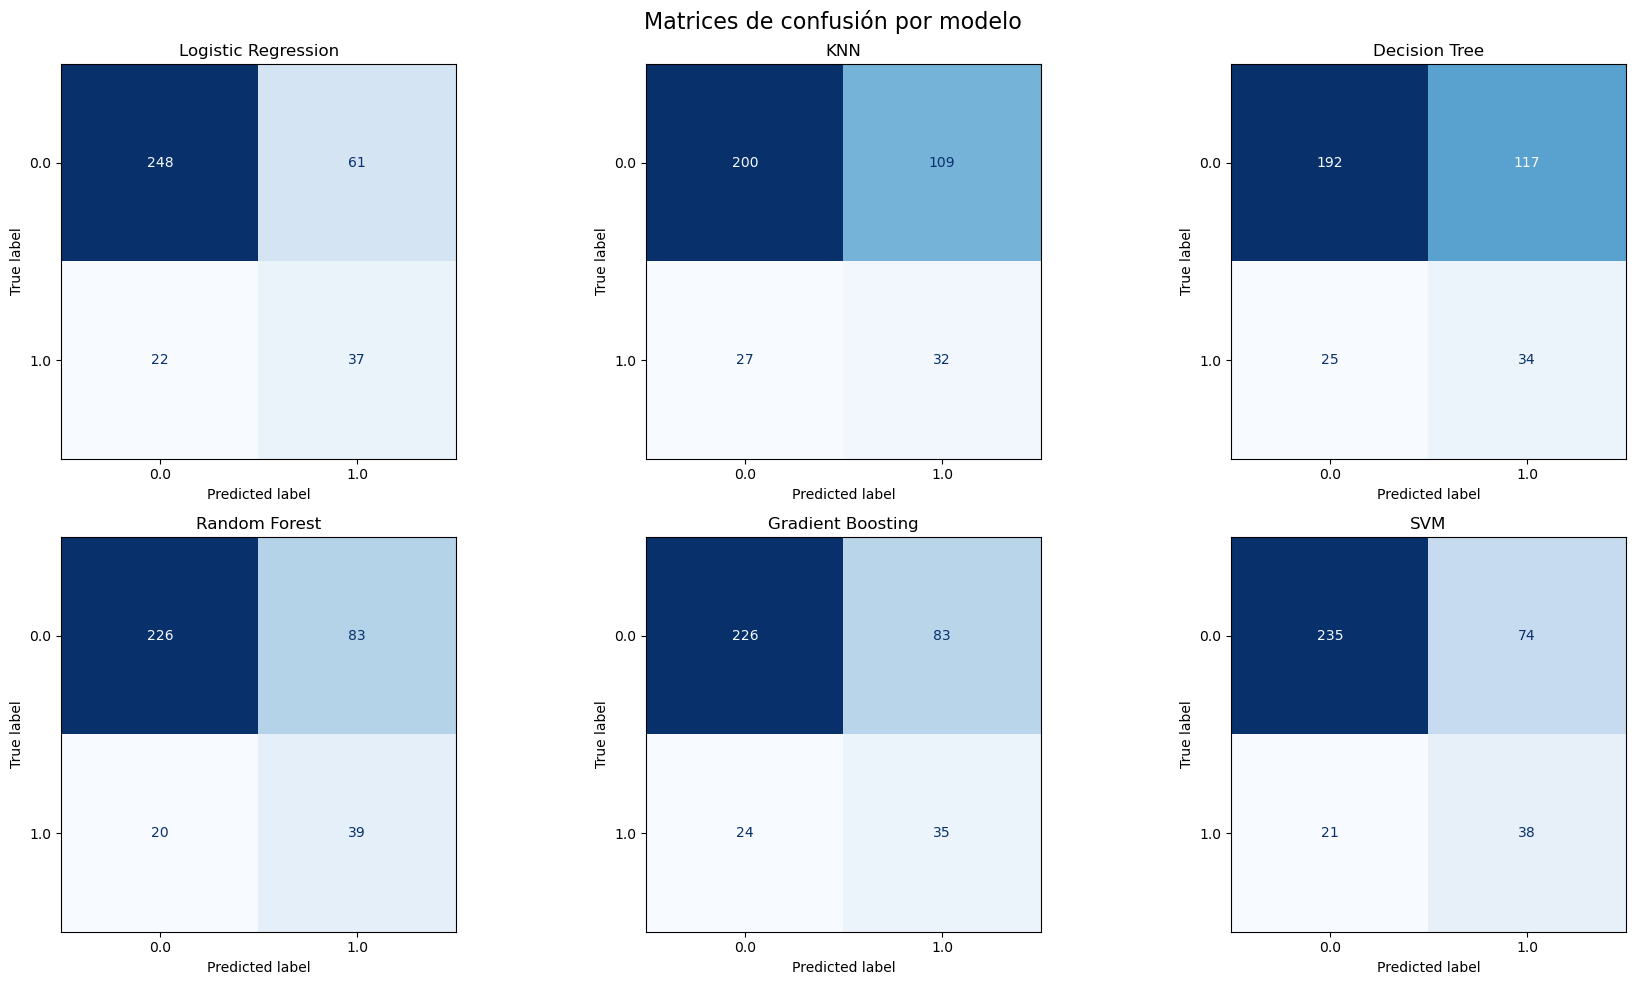

In [29]:
#  Diccionario de modelos
models_2 = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced", random_state=42),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(class_weight="balanced", random_state=42)
}

# Entrenamiento y evaluación con datos balanceados en train
results_2 = []

for name, model in models_2.items():
    model.fit(X_train_balanced, y_train_balanced)  # ahora entrenamos con los datos balanceados
    y_pred_2 = model.predict(X_test_2)  # test se mantiene intacto (realista)

    results_2.append({
        "Modelo": name,
        "Accuracy": accuracy_score(y_test_2, y_pred_2),
        "Precision": precision_score(y_test_2, y_pred_2),
        "Recall": recall_score(y_test_2, y_pred_2),
        "F1-Score": f1_score(y_test_2, y_pred_2)
    })

# Convertir resultados a DataFrame ordenados por F1
results_2_df = pd.DataFrame(results_2).sort_values(by="F1-Score", ascending=False)
print(results_2_df)

#  Matrices de confusión de todos los modelos
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 filas x 3 columnas (ajusta según # de modelos)
axes = axes.flatten()

for i, (name, model) in enumerate(models_2.items()):
    y_pred_2 = model.predict(X_test_2)
    cm = confusion_matrix(y_test_2, y_pred_2)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=axes[i], cmap="Blues", colorbar=False)
    axes[i].set_title(name)

plt.suptitle("Matrices de confusión por modelo", fontsize=16)
plt.tight_layout()
plt.show()

##  ¿Qué es SMOTE y cómo funciona?

**SMOTE (Synthetic Minority Over-sampling Technique)** es una técnica utilizada para manejar el **desbalance de clases** en problemas de clasificación.

En lugar de simplemente duplicar las muestras de la clase minoritaria, **SMOTE crea nuevas observaciones sintéticas** siguiendo este proceso:

1. **Identificación de vecinos cercanos:**  
   Para cada muestra de la clase minoritaria, se seleccionan uno o varios de sus *k* vecinos más cercanos.

2. **Interpolación:**  
   Se genera un punto artificial ubicado en la línea que conecta la muestra original con uno de sus vecinos.  
   Matemáticamente:  
   \[
   x_{nuevo} = x_i + \delta \cdot (x_{vecino} - x_i)
   \]  
   donde \( \delta \) es un número aleatorio entre 0 y 1.

3. **Nuevas muestras:**  
   Este procedimiento se repite hasta que la clase minoritaria alcance el mismo tamaño que la clase mayoritaria (o el nivel de balance deseado).


### Ventajas de SMOTE
- Evita simplemente duplicar datos, lo que reduce el riesgo de **sobreajuste**.  
- Genera ejemplos más variados y representativos de la clase minoritaria.  
- Mejora la capacidad del modelo para **detectar patrones de la clase menos frecuente**.  

### Consideraciones
- Puede introducir ruido si los datos minoritarios están mal distribuidos.  
- No siempre es ideal si hay **mucho solapamiento** entre clases.  

En problemas de **Recursos Humanos**, como la predicción de *Attrition (rotación de empleados)*, SMOTE ayuda a que el modelo aprenda mejor los casos de renuncia, que suelen ser menos frecuentes que los de permanencia.


## Oversampling con SMOTE y evaluación de modelos  

En este bloque se aborda el problema de **desbalance de clases** en la variable objetivo (*Attrition*).  

1. **Separación de variables**  
   - `X_3`: todas las variables predictoras.  
   - `y_3`: variable objetivo (`Attrition_Yes`).  

2. **División train/test estratificada**  
   - 75% de los datos para entrenamiento y 25% para prueba.  
   - Se utiliza `stratify=y_3` para mantener la proporción original de clases en ambos subconjuntos.  

3. **Oversampling con SMOTE (Synthetic Minority Over-sampling Technique)**  
   - Se aplica **solo sobre el conjunto de entrenamiento** (`X_train_3`, `y_train_3`).  
   - SMOTE genera **nuevos ejemplos sintéticos de la clase minoritaria (Attrition=Yes)** creando puntos artificiales en el espacio de las características, en lugar de simplemente duplicar observaciones existentes.  
   - El resultado es un conjunto de entrenamiento balanceado (`X_train_over_3`, `y_train_over_3`), mientras que el conjunto de prueba se mantiene desbalanceado para una evaluación realista.  

4. **Entrenamiento de modelos**  
   - Se comparan varios algoritmos: **Logistic Regression, KNN, Decision Tree, Random Forest, Gradient Boosting y SVM**.  
   - Cada modelo se entrena con los datos balanceados y se evalúa en el test original.  

5. **Evaluación y resultados**  
   - Se calculan métricas clave: **Accuracy, Precision, Recall y F1-Score**.  
   - Se organiza una tabla comparativa ordenada por **F1-Score** para identificar el mejor modelo.  
   - Finalmente, se grafican las **matrices de confusión** en una cuadrícula, lo que permite visualizar aciertos y errores de cada modelo (TP, TN, FP, FN).  

 Este proceso permite que los modelos aprendan a reconocer mejor la clase minoritaria (*renuncias*), mejorando la capacidad predictiva en problemas de **rotación de personal (Attrition)**.


Distribución original en train:
 Attrition_Yes
0.0    924
1.0    178
Name: count, dtype: int64

Distribución después de SMOTE:
 Attrition_Yes
0.0    924
1.0    924
Name: count, dtype: int64
                Modelo  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.782609   0.389474  0.627119  0.480519
5                  SVM  0.839674   0.500000  0.423729  0.458716
4    Gradient Boosting  0.864130   0.655172  0.322034  0.431818
3        Random Forest  0.858696   0.705882  0.203390  0.315789
1                  KNN  0.576087   0.198758  0.542373  0.290909
2        Decision Tree  0.741848   0.256757  0.322034  0.285714


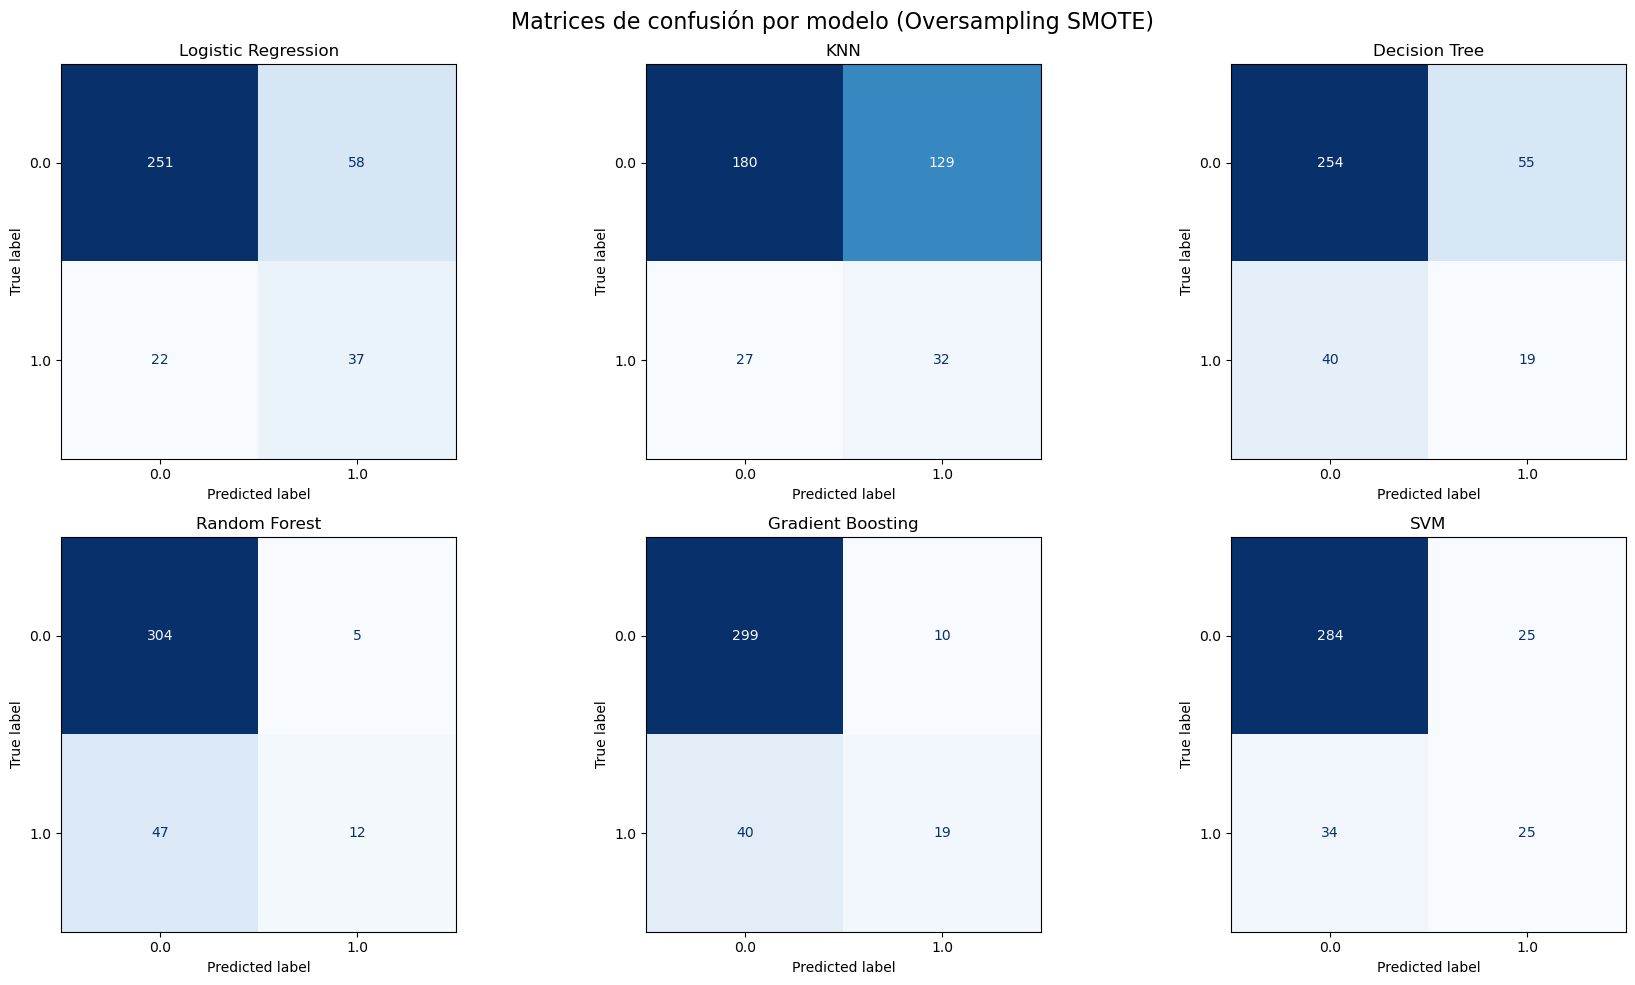

In [30]:

#  Definir X_3 e y_3
X_3 = df_encoded.drop(columns=["Attrition_Yes"])
y_3 = df_encoded["Attrition_Yes"]

#  División estratificada train/test
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    X_3, y_3,
    test_size=0.25,
    random_state=42,
    stratify=y_3
)

#  Oversampling con SMOTE SOLO en train
smote = SMOTE(random_state=42)
X_train_over_3, y_train_over_3 = smote.fit_resample(X_train_3, y_train_3)

# ✅ Verificación
print("Distribución original en train:\n", y_train_3.value_counts())
print("\nDistribución después de SMOTE:\n", y_train_over_3.value_counts())

#  Diccionario de modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced", random_state=42),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(class_weight="balanced", random_state=42)
}

#  Entrenamiento y evaluación
results_df_3 = []

for name, model in models.items():
    model.fit(X_train_over_3, y_train_over_3)   # entrenamos con oversampling
    y_pred_3 = model.predict(X_test_3)          # test sigue desbalanceado

    results_df_3.append({
        "Modelo": name,
        "Accuracy": accuracy_score(y_test_3, y_pred_3),
        "Precision": precision_score(y_test_3, y_pred_3),
        "Recall": recall_score(y_test_3, y_pred_3),
        "F1-Score": f1_score(y_test_3, y_pred_3)
    })

# Convertir resultados a DataFrame
results_df_3 = pd.DataFrame(results_df_3).sort_values(by="F1-Score", ascending=False)
print(results_df_3)

#  Matrices de confusión en cuadrícula
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # ajustar filas/columnas según modelos
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    y_pred_3 = model.predict(X_test_3)
    cm = confusion_matrix(y_test_3, y_pred_3)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=axes[i], cmap="Blues", colorbar=False)
    axes[i].set_title(name)

plt.suptitle("Matrices de confusión por modelo (Oversampling SMOTE)", fontsize=16)
plt.tight_layout()
plt.show()
